# Aulas 02 e 03 - Matplotlib

O matplotlib é uma biblioteca que permite graficar diversos tipos de representações diretamente a partir de arrays. Possui essencialmente todos os tipos de gráficos que estudamos na aula passada, mas com uma sintaxe diferente a do pandas, o que afetará não somente como plotamos as visualizações, mas, também, elementos "estéticos" associados a elas (como legendas, eixos e afins). 

A biblioteca do matplotlib define alguns **elementos básicos** a partir dos quais se estruturam todas as suas funções.

### Elementos básicos de uma figura com matplotlib

[Guia oficial do matplotlib](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

Na figura abaixo, temos definidos os **elementos básicos** mencionados acima. Eles servirão como parâmetros nas mais variadas funções da biblioteca.

<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="drawing" width="600"/>

É essencial que entendamos três outros elementos fundamentais para a melhor utilização da biblioteca matplotlib:

**-Figure:** é a imagem como um todo; a "figura" prorpiamente dita.

**-Axes:** contém todos os elementos do plot em si, incluindo os eixos, mas não apenas eles.

**-Axis:** são os eixos do gráfico (eixo-x; eixo-y; eixo-z).

## Exemplos de algumas visualizações

In [1]:
import pandas as pd

Vamos utilizar, como exemplo, um [dataset de vendas do Walmart](https://www.kaggle.com/datasets/naveenkumar20bps1137/walmart-sales-analysis).

In [2]:
df = pd.read_csv("Walmart.csv")

In [3]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [4]:
df.shape

(3203, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       3203 non-null   object 
 1   Order Date     3203 non-null   object 
 2   Ship Date      3203 non-null   object 
 3   Customer Name  3203 non-null   object 
 4   Country        3203 non-null   object 
 5   City           3203 non-null   object 
 6   State          3203 non-null   object 
 7   Category       3203 non-null   object 
 8   Product Name   3203 non-null   object 
 9   Sales          3203 non-null   float64
 10  Quantity       3203 non-null   float64
 11  Profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


[Gráfico de linhas](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

Vamos avaliar o número total de pedidos ao longo do tempo?

In [6]:
# Convertendo a data para datetime
df['date'] = pd.to_datetime(df['Order Date'])

In [7]:
df[['Order Date', 'date']]

,Order Date,date
0,13-06-2013,2013-06-13
1,09-06-2011,2011-09-06
2,09-06-2011,2011-09-06
3,09-06-2011,2011-09-06
4,09-06-2011,2011-09-06
...,...,...
3198,30-09-2013,2013-09-30
3199,27-02-2014,2014-02-27
3200,27-02-2014,2014-02-27
3201,27-02-2014,2014-02-27


Como seria o plot com pandas?

In [9]:
df.head(2)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,date
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013-06-13
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011-09-06


<AxesSubplot: xlabel='date'>

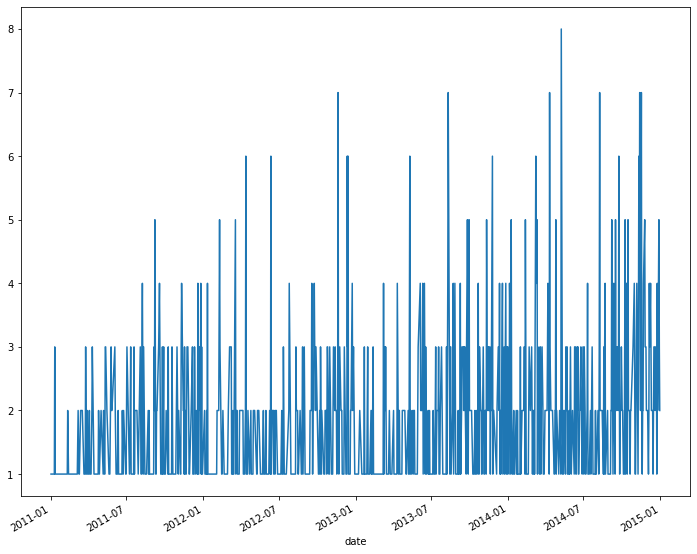

In [12]:
df.groupby("date")['Order ID'].nunique().plot(figsize = (12,10))

E os produtos por data?

<AxesSubplot: xlabel='date'>

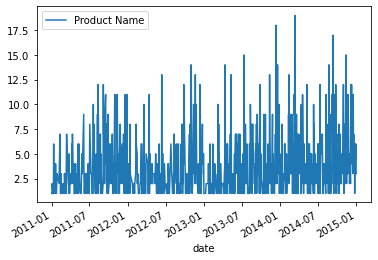

In [15]:
df.groupby("date")[['Product Name']].count().plot()

Como faríamos com o matplotlib?

In [16]:
import matplotlib.pyplot as plt

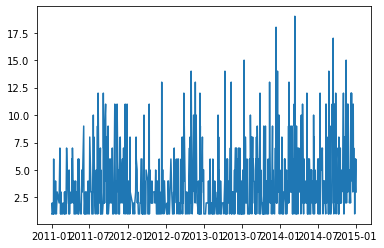

In [19]:
plt.plot(df.groupby("date")[['Product Name']].count())

O pacote já "entende" o que estamos tentando fazer se passarmos puramente o dataframe agrupado, mas também podemos querer especificar cada parâmetro separadamente.

In [20]:
df_grouped = df.groupby("date")[['Product Name']].count()
df_grouped

,Product Name
date,
2011-01-02,1
2011-01-03,1
2011-01-04,2
2011-01-07,1
2011-01-08,1
...,...
2014-12-25,6
2014-12-26,3
2014-12-29,6


In [21]:
x = list(df_grouped.index)
y = df_grouped.values

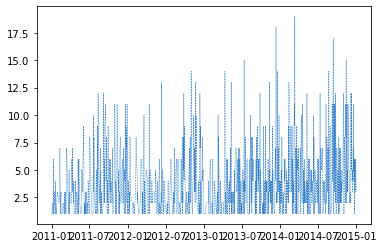

In [38]:
plt.plot(x,y, c = (0.2,0.5,0.8), linestyle = '--', linewidth = 0.5, markersize = 5)

Quais as principais diferenças no plot com os dois pacotes?

- O matplotlib produz um gráfico "menos processado" (menos personalização por padrão; por ex: não vem com legenda, nomes nos eixos etc)

[Gráfico de barras](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

Vamos plotar os estados mais lucrativos no dataset todo?

In [39]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,date
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013-06-13
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011-09-06
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011-09-06
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011-09-06
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011-09-06


<AxesSubplot: xlabel='State'>

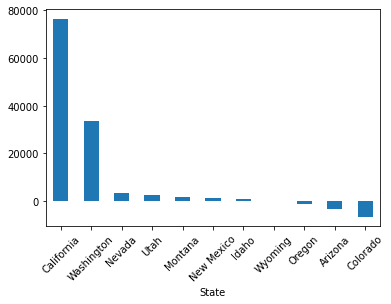

In [44]:
# Com o pandas
df.groupby("State")['Profit'].sum().sort_values(ascending = False).plot(kind = 'bar', rot = 45)

E com matplotlib?

In [45]:
df_grouped = df.groupby("State")['Profit'].sum().sort_values(ascending = False)

In [46]:
x = list(df_grouped.index)
y = df_grouped.values

<BarContainer object of 11 artists>

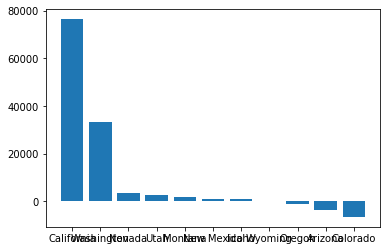

In [50]:
plt.bar(x,y,width = 0.8)

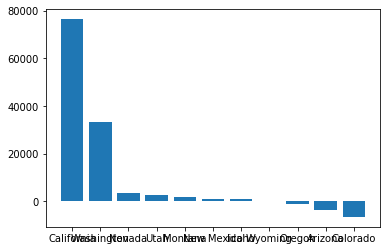

In [51]:
bars = plt.bar(x,y,width = 0.8)

In [52]:
bars

<BarContainer object of 11 artists>

Vamos colocar os rótulos nas barras?

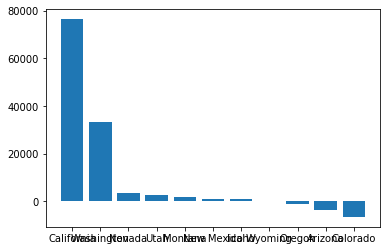

In [57]:
fig = plt.figure() # declara uma figura

bars = plt.bar(x,y)
ax = fig.get_axes()

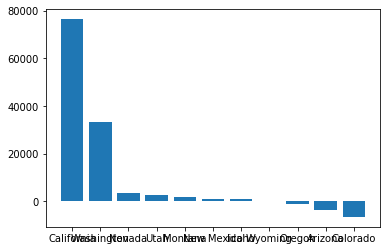

In [58]:
fig

In [59]:
ax

[<AxesSubplot: >]

[Axes.bar_label](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html)

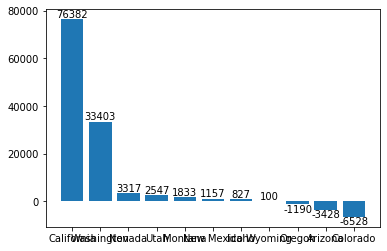

In [63]:
fig = plt.figure() # declara uma figura

bars = plt.bar(x,y) # plota o gráfico
ax = fig.get_axes() # retorna o elemento "axes"

ax[0].bar_label(bars, fmt = '%.0f');

In [67]:
bars.datavalues

array([76381.6 , 33402.7 ,  3316.76,  2546.56,  1833.32,  1157.13,
         826.73,   100.2 , -1190.48, -3427.87, -6527.86])

<ipython-input-76-d1280127860c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels = x, rotation = 45);


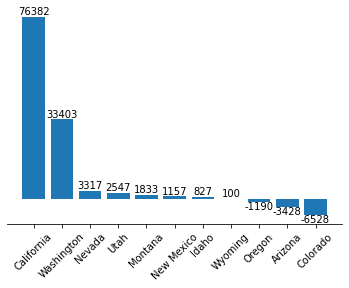

In [76]:
fig = plt.figure() # declara uma figura

bars = plt.bar(x,y) # plota o gráfico
ax = fig.get_axes() # retorna o elemento "axes"

ax[0].bar_label(bars, fmt = '%.0f')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)

ax[0].get_yaxis().set_visible(False)

ax[0].set_xticklabels(labels = x, rotation = 45);

E se quiséssemos fazer o mesmo tipo de visão, mas uma por ano, na mesma figura?

Vamos, primeiro, pensar com "dados fictícios"

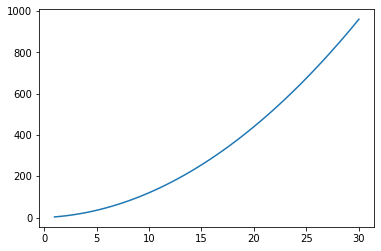

In [77]:
import numpy as np

# dados fícticios
x = np.linspace(1,30,50)
y = 2*x + x**2

plt.plot(x,y)

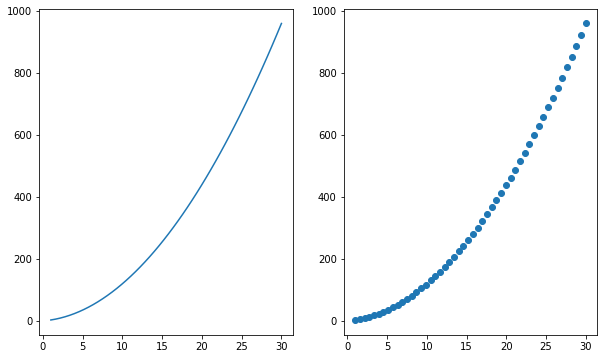

In [86]:
# Abrindo a figura e objetos dos "axes"
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,6))

# primeiro plot
ax[0].plot(x,y)

# segundo plot
ax[1].scatter(x,y)

In [83]:
ax

array([[<AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >]], dtype=object)

Uma outra forma...

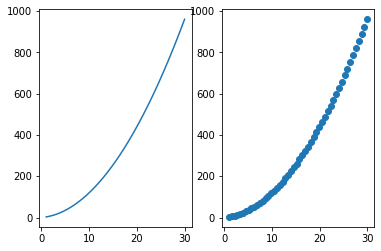

In [88]:
# Pensando em uma figura 1 x 2 (1 linha e 2 colunas)

# Plotando na primeira posição da figura
plt.subplot(1,2,1)
plt.plot(x,y)

# Plotando na segunda posição da figura
plt.subplot(1,2,2)
plt.scatter(x,y)

(<Figure size 432x288 with 4 Axes>,
 array([[<AxesSubplot: >, <AxesSubplot: >],
        [<AxesSubplot: >, <AxesSubplot: >]], dtype=object))

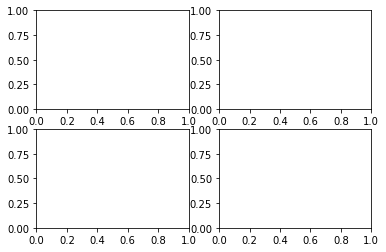

In [98]:
plt.subplots(2,2)

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: >], dtype=object))

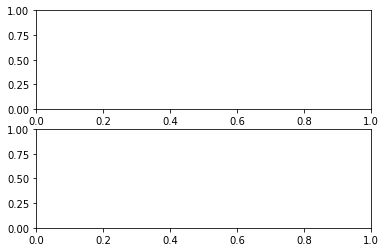

In [99]:
plt.subplots(2,1)

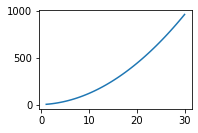

In [97]:
plt.subplot(2,2,1)
plt.plot(x,y)

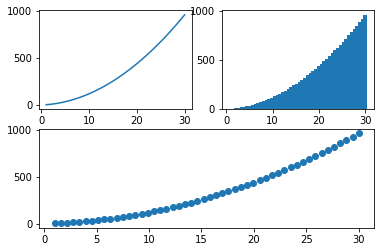

In [96]:
plt.subplot(2,2,1)
plt.plot(x,y)

plt.subplot(2,2,2)
plt.bar(x,y)

plt.subplot(2,1,2)
plt.scatter(x,y)

<BarContainer object of 50 artists>

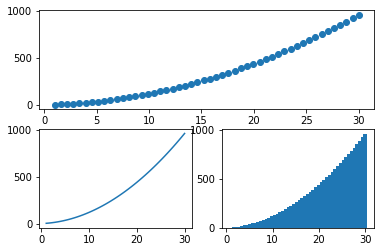

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1,30,50)
y = 2*x + x**2

plt.subplot(2,1,1)
plt.scatter(x,y)

plt.subplot(2,2,3)
plt.plot(x,y)

plt.subplot(2,2,4)
plt.bar(x,y)



Voltando ao nosso conjunto de dados...

In [100]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,date
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013-06-13
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011-09-06
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011-09-06
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011-09-06
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011-09-06


Vamos fazer um gráfico de barras, como acima, mas por ano.

In [102]:
df['date'].min()

Timestamp('2011-01-02 00:00:00')

In [104]:
df['date'].max()

Timestamp('2014-12-31 00:00:00')

<ipython-input-128-88a8d6341ba3>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,i].set_xticklabels(labels = x, rotation = 45)
<ipython-input-128-88a8d6341ba3>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,i].set_xticklabels(labels = x, rotation = 45)
<ipython-input-128-88a8d6341ba3>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,i].set_xticklabels(labels = x, rotation = 45)
<ipython-input-128-88a8d6341ba3>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,i].set_xticklabels(labels = x, rotation = 45)


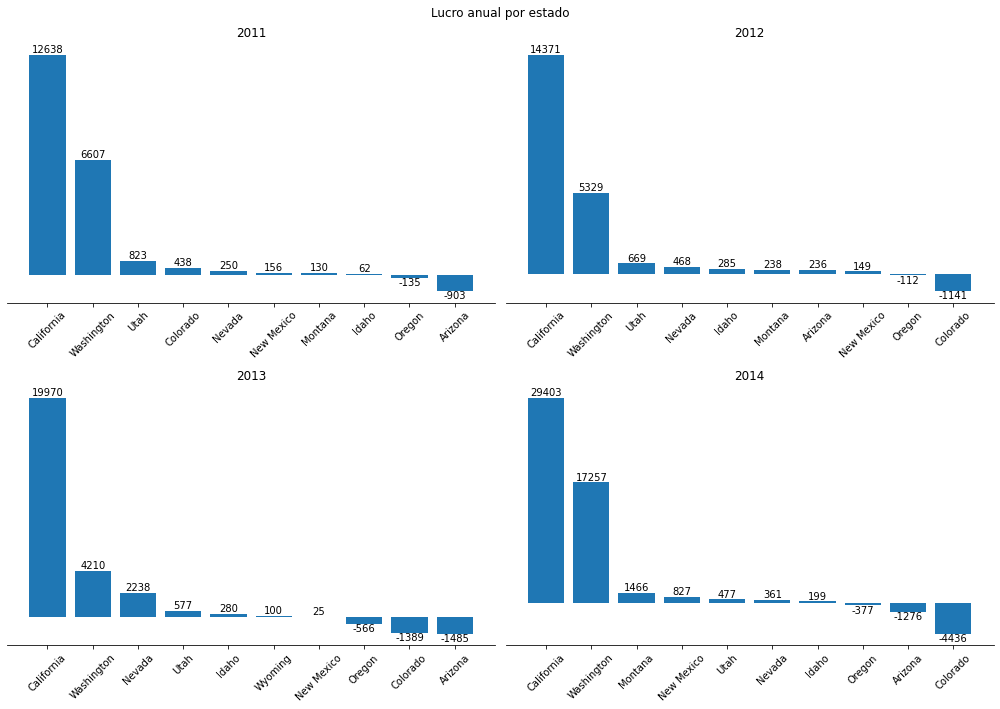

In [128]:
# Vamos dividir nossa figura em 4 gráficos (um por ano)
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14,10))
ax = np.reshape(ax, (1,4))

year = ['2011', '2012', '2013', '2014']

subplot_counter = 1
for i in range(0,4):
    plt.subplot(2,2,subplot_counter)
    
    # Para cada ano
    df_year = df[(df['date'] >= year[i]+'-01-01') & (df['date'] <= year[i]+'-12-31')]
    df_grouped = df_year.groupby("State")['Profit'].sum().sort_values(ascending = False)
    
    x = list(df_grouped.index)
    y = df_grouped.values
    
    bars = plt.bar(x,y)
    subplot_counter += 1
    
    plt.title(year[i])
    
    ax[0,i].bar_label(bars, fmt = '%.0f')

    ax[0,i].spines['right'].set_visible(False)
    ax[0,i].spines['top'].set_visible(False)
    ax[0,i].spines['left'].set_visible(False)

    ax[0,i].get_yaxis().set_visible(False)

    ax[0,i].set_xticklabels(labels = x, rotation = 45)

plt.suptitle("Lucro anual por estado")
plt.tight_layout()

## Vamos, agora, "por a mão na massa"!

### Gerando algumas visualizações descritivas com matplotlib

Vamos utilizar um dataset [dos preços dos combustíveis no Brasil](https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil).

Reproduza as visualizações abaixo. Para cada uma, pense em pontos que você poderia modificar na visualização, pensando em aprimorá-la.

#### Preços médios do etanol e da gasolina, por região do Brasil

In [7]:
import pandas as pd
df = pd.read_csv('Datasets/gas_prices_brazil.tsv', sep = '\t')

In [8]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [9]:
# Se quiséssemos converter as datas para "semana do ano"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [10]:
df['date'] = pd.to_datetime(df['DATA FINAL'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   120823 non-null  object        
 1   DATA FINAL                     120823 non-null  object        
 2   REGIÃO                         120823 non-null  object        
 3   ESTADO                         120823 non-null  object        
 4   PRODUTO                        120823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 6   UNIDADE DE MEDIDA              120823 non-null  object        
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64       
 11  

In [14]:
df['date'].dt.isocalendar()

,year,week,day
0,2004,20,6
1,2004,20,6
2,2004,20,6
3,2004,20,6
4,2004,20,6
...,...,...,...
120818,2021,17,6
120819,2021,17,6
120820,2021,17,6
120821,2021,17,6


In [15]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,date
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,2004-05-15
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,2004-05-15
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,2004-05-15
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,2004-05-15
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,2004-05-15


In [19]:
# Vamos selecionar as colunas que vamos precisar
df2 = df[['PREÇO MÉDIO REVENDA', 'DATA FINAL', 'REGIÃO', 'PRODUTO']][df['PRODUTO'].isin(['ETANOL HIDRATADO', 'GASOLINA COMUM'])]

In [20]:
df2.head()

,PREÇO MÉDIO REVENDA,DATA FINAL,REGIÃO,PRODUTO
0,1.288,2004-05-15,CENTRO OESTE,ETANOL HIDRATADO
1,1.162,2004-05-15,CENTRO OESTE,ETANOL HIDRATADO
2,1.389,2004-05-15,CENTRO OESTE,ETANOL HIDRATADO
3,1.262,2004-05-15,CENTRO OESTE,ETANOL HIDRATADO
4,1.181,2004-05-15,NORDESTE,ETANOL HIDRATADO


In [16]:
df['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'OLEO DIESEL', 'OLEO DIESEL S10',
       'GASOLINA ADITIVADA'], dtype=object)

In [21]:
df_etanol = df2[df2['PRODUTO'] == 'ETANOL HIDRATADO']
df_gasolina = df2[df2['PRODUTO'] == 'GASOLINA COMUM']

In [27]:
df_etanol['PREÇO MÉDIO REVENDA'].max()

5.96

In [30]:
df_etanol_agrupado = df_etanol\
    .groupby(["DATA FINAL", "REGIÃO"])\
    ['PREÇO MÉDIO REVENDA']\
    .mean()
df_etanol_agrupado

DATA FINAL  REGIÃO      
2004-05-15  CENTRO OESTE    1.275250
            NORDESTE        1.367333
            NORTE           1.593286
            SUDESTE         1.054750
            SUL             1.125000
                              ...   
2021-05-01  CENTRO OESTE    4.116250
            NORDESTE        4.439444
            NORTE           4.647000
            SUDESTE         4.294250
            SUL             4.591667
Name: PREÇO MÉDIO REVENDA, Length: 4365, dtype: float64

In [31]:
df_etanol_agrupado = df_etanol\
    .groupby(["DATA FINAL", "REGIÃO"])\
    ['PREÇO MÉDIO REVENDA']\
    .mean()\
    .unstack()
df_etanol_agrupado

REGIÃO,CENTRO OESTE,NORDESTE,NORTE,SUDESTE,SUL
DATA FINAL,,,,,
2004-05-15,1.27525,1.367333,1.593286,1.05475,1.125000
2004-05-22,1.26900,1.365889,1.586286,1.05000,1.123000
2004-05-29,1.27225,1.363111,1.593857,1.06500,1.145333
2004-06-05,1.31450,1.364778,1.607429,1.10900,1.219000
2004-06-12,1.33100,1.381444,1.626143,1.12175,1.241333
...,...,...,...,...,...
2021-04-03,4.17575,4.497333,4.726571,4.37400,4.634000
2021-04-10,4.02875,4.460000,4.698286,4.25750,4.548333
2021-04-17,3.95225,4.447889,4.647714,4.20875,4.528000


<AxesSubplot: >

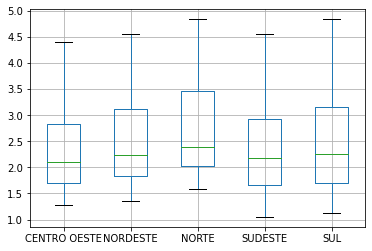

In [32]:
df_etanol_agrupado.boxplot()

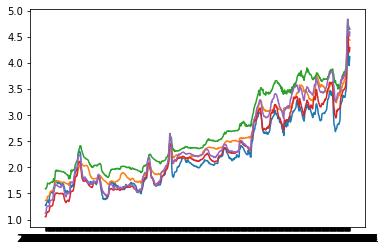

In [33]:
datas = df_etanol_agrupado.index.to_list() # eixo-x do gráfico
plt.plot(df_etanol_agrupado)

In [38]:
df_etanol_agrupado.columns.to_list()

['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL']

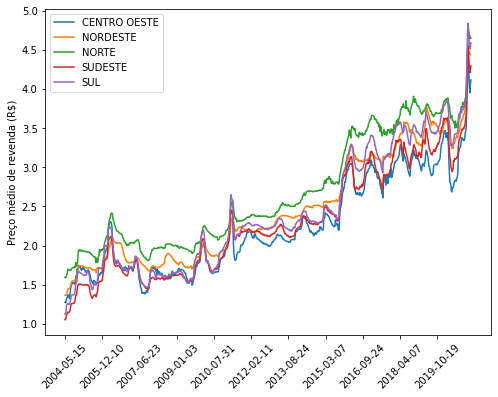

In [56]:
datas = df_etanol_agrupado.index.to_list() # eixo-x do gráfico

plt.figure(figsize = (8,6))
for region in df_etanol_agrupado.columns.to_list():
    y = df_etanol_agrupado[region] # eixo-y
    plt.plot(datas,y)

plt.legend(df_etanol_agrupado.columns.to_list())
plt.ylabel('Preço médio de revenda (R$)')

plt.xticks(datas[::80],rotation=45);

In [58]:
df2.head()

,PREÇO MÉDIO REVENDA,DATA FINAL,REGIÃO,PRODUTO
0,1.288,2004-05-15,CENTRO OESTE,ETANOL HIDRATADO
1,1.162,2004-05-15,CENTRO OESTE,ETANOL HIDRATADO
2,1.389,2004-05-15,CENTRO OESTE,ETANOL HIDRATADO
3,1.262,2004-05-15,CENTRO OESTE,ETANOL HIDRATADO
4,1.181,2004-05-15,NORDESTE,ETANOL HIDRATADO


In [59]:
df_etanol_agrupado = df_etanol\
    .groupby(["DATA FINAL", "REGIÃO"])\
    ['PREÇO MÉDIO REVENDA']\
    .mean()\
    .unstack()
df_etanol_agrupado

REGIÃO,CENTRO OESTE,NORDESTE,NORTE,SUDESTE,SUL
DATA FINAL,,,,,
2004-05-15,1.27525,1.367333,1.593286,1.05475,1.125000
2004-05-22,1.26900,1.365889,1.586286,1.05000,1.123000
2004-05-29,1.27225,1.363111,1.593857,1.06500,1.145333
2004-06-05,1.31450,1.364778,1.607429,1.10900,1.219000
2004-06-12,1.33100,1.381444,1.626143,1.12175,1.241333
...,...,...,...,...,...
2021-04-03,4.17575,4.497333,4.726571,4.37400,4.634000
2021-04-10,4.02875,4.460000,4.698286,4.25750,4.548333
2021-04-17,3.95225,4.447889,4.647714,4.20875,4.528000


Text(0.5, 0.98, 'Preço médio de revenda por região')

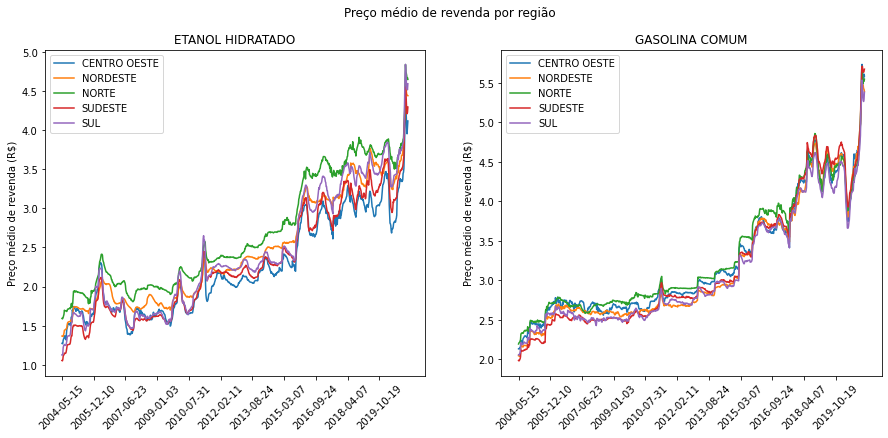

In [65]:
# Plotando a figura toda

# Como precisam estar na mesma janela de figura
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))

produtos = ['ETANOL HIDRATADO', 'GASOLINA COMUM']

subplot_index = 1
for produto in produtos:
    plt.subplot(1, 2, subplot_index)
    
    df_filtered = df2[df2['PRODUTO'] == produto]
    
    df_grouped = df_filtered.groupby(["DATA FINAL", "REGIÃO"])['PREÇO MÉDIO REVENDA'].mean().unstack()
    
    plt.plot(df_grouped)
    
    # Legenda
    plt.legend(df_grouped.columns.to_list())
    plt.ylabel("Preço médio de revenda (R$)")
    plt.xticks(datas[::80],rotation=45)
    plt.title(produto)
    
    
    subplot_index += 1
    
plt.suptitle("Preço médio de revenda por região")

Text(0.5, 0.98, 'Preço médio de revenda por região')

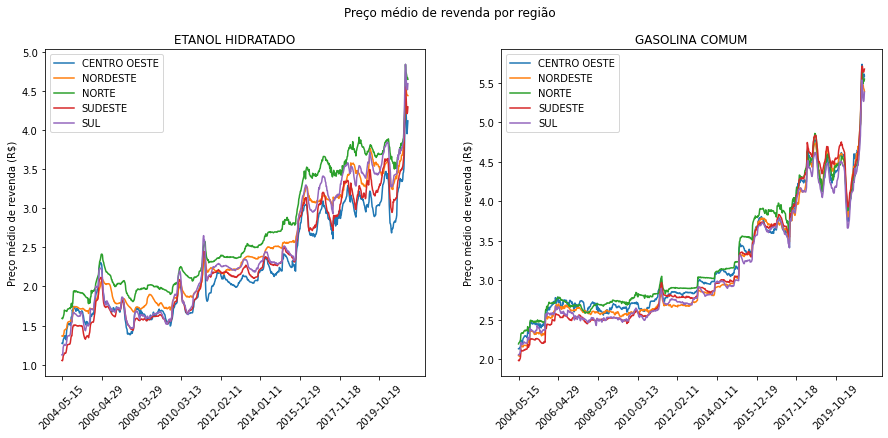

#### Preço médio em 2020 dos preços do Etanol e da Gasolina por região

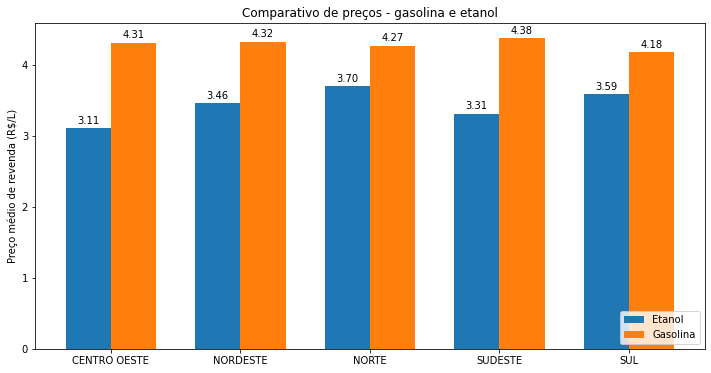

array([0, 1, 2, 3, 4])

#### Total consolidado de postos para cada estado

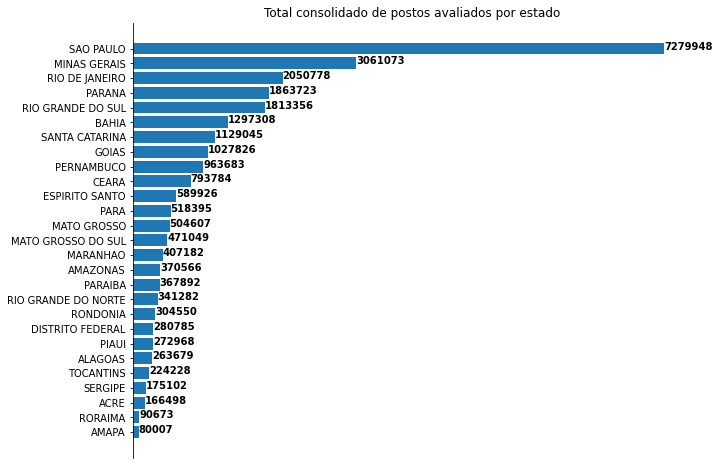

#### Relação entre preço da gasolina e do etanol (nível Brasil)

In [66]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,date
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,2004-05-15
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,2004-05-15
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,2004-05-15
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,2004-05-15
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,2004-05-15


Text(0, 0.5, 'Preço médio de revenda (gasolina)')

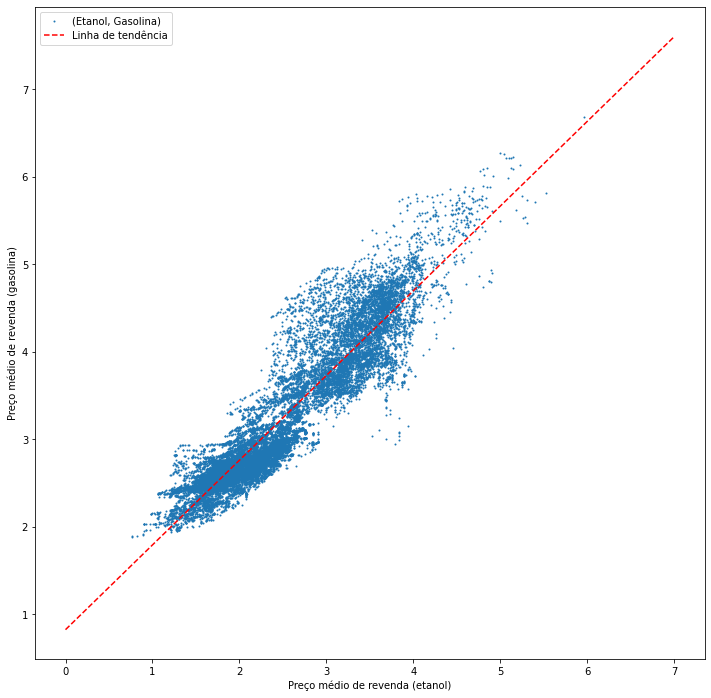

In [92]:
from scipy.stats import linregress

etanol = df[df['PRODUTO'] == 'ETANOL HIDRATADO'][['DATA FINAL', 'ESTADO', 'PREÇO MÉDIO REVENDA']]
gasolina = df[df["PRODUTO"] == 'GASOLINA COMUM'][['DATA FINAL', 'ESTADO', 'PREÇO MÉDIO REVENDA']]

gasolina = gasolina.merge(etanol, how = 'inner', on = ['DATA FINAL', 'ESTADO'])

plt.figure(figsize = (12,12))

x = gasolina['PREÇO MÉDIO REVENDA_y']
y = gasolina['PREÇO MÉDIO REVENDA_x']

plt.scatter(x = x,
            y = y,
           s = 1)

# Linha de tendência
fit = linregress(x,y)

# valores quaisquer de x, dentro do intervalo do nosso plot
x_2 = np.linspace(0,7,100)
y_2 = fit[0]*x_2 + fit[1]
plt.plot(x_2, y_2, '--r')

plt.legend(['(Etanol, Gasolina)', 'Linha de tendência'])

plt.xlabel('Preço médio de revenda (etanol)')
plt.ylabel('Preço médio de revenda (gasolina)')

In [88]:
fit

LinregressResult(slope=0.968116937705748, intercept=0.8250015078177557, rvalue=0.9258173469898157, pvalue=0.0, stderr=0.0025816713620703986)

In [80]:
gasolina

,DATA FINAL,PREÇO MÉDIO REVENDA_x,PREÇO MÉDIO REVENDA_y
0,2004-05-15,2.029,1.288
1,2004-05-15,2.029,1.162
2,2004-05-15,2.029,1.389
3,2004-05-15,2.029,1.262
4,2004-05-15,2.029,1.181
...,...,...,...
632849,2021-05-01,5.751,4.530
632850,2021-05-01,5.751,4.556
632851,2021-05-01,5.751,3.694
632852,2021-05-01,5.751,4.509


In [69]:
etanol.shape

(23440,)

In [70]:
gasolina.shape

(23570,)

Text(0, 0.5, 'Preço médio de revenda (gasolina)')

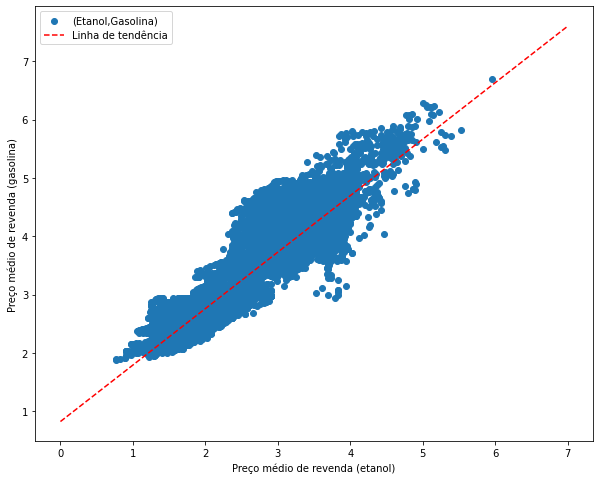